<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Ergontropic_QM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

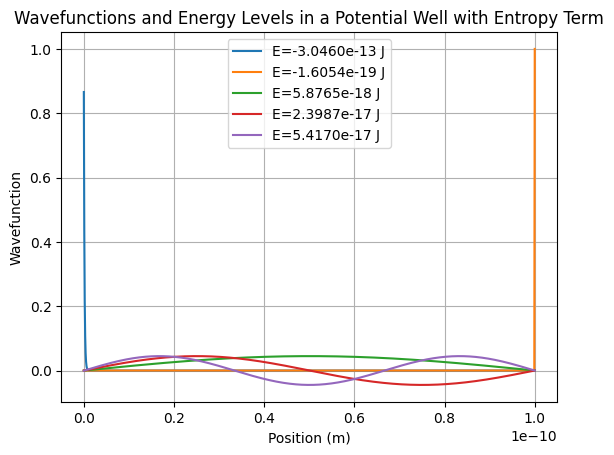

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Parameters
hbar = 1.0545718e-34  # Reduced Planck's constant in J·s
m = 9.10938356e-31    # Mass of electron in kg
V0 = 1.0                # Depth of the potential well in eV (converted to Joules)
L = 1e-10               # Width of the potential well in meters
kB = 1.380649e-23      # Boltzmann constant in J/K
num_points = 1000       # Number of points for discretization
x = np.linspace(0, L, num_points)
dx = x[1] - x[0]

# Convert potential depth from eV to Joules
V0_joules = V0 * 1.60218e-19

# Hamiltonian matrix
H = np.zeros((num_points, num_points))

# Kinetic energy term
for i in range(1, num_points - 1):
    H[i, i-1] = -hbar**2 / (2 * m * dx**2)
    H[i, i+1] = -hbar**2 / (2 * m * dx**2)
    H[i, i] = hbar**2 / (m * dx**2)

# Potential energy term
H -= V0_joules * np.eye(num_points)

# Entropy term (diagonal matrix)
psi0 = np.sin(np.pi * x / L)  # Initial guess for the wavefunction
entropy_term = kB * np.diag(np.log(np.abs(psi0)**2 + 1e-10))
H += entropy_term

# Solve for eigenvalues and eigenvectors
energies, wavefunctions = eigh(H)

# Plot the first few wavefunctions and energy levels
num_states = 5
for i in range(num_states):
    plt.plot(x, wavefunctions[:, i], label=f'E={energies[i]:.4e} J')

plt.xlabel('Position (m)')
plt.ylabel('Wavefunction')
plt.title('Wavefunctions and Energy Levels in a Potential Well with Entropy Term')
plt.legend()
plt.grid()
plt.show()